O que é QSPR? 
 
- (Q)SPR (Relação Quantitativa Estrutura-Propriedade) 

- Esse modelo SPR desenvolvido corresponde a compreensão se caso a molécula é mutagênica ou não. 

- Mutagenicidade é a propriedade de substâncias para induzir mutação genética. É uma das propriedades ambientais, de saúde e segurança (EHS) mais importantes a serem verificadas ao lidar com novos produtos químicos (por exemplo, drogas ou solventes). Neste caso, vamos usar os dados de mutagenicidade em Salmonella typhimurium (teste de Ames). Este conjunto de dados foi coletado pelo Istituto di Ricerche Farmacologiche Mario Negri, mesclando dados experimentais de um conjunto de dados de referência compilado por [HMS 09] a partir de uma coleção de dados disponibilizada pelo Ministério da Saúde do Japão em seu projeto Ames (Q)SAR.

# 1. Importando as bibliotecas

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 2. Importando dados 

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/edgarsmdn/MLCE_book/main/references/mutagenicity_kNN.csv")

In [4]:
data.head()

,Unnamed: 0,Id,CAS,SMILES,Status,Experimental value,Predicted value,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
0,0,1,100-00-5,O=[N+]([O-])c1ccc(cc1)Cl,Training,1,1,52,0.463602,43.14,38.1064,3.003401,244.429658,157.556,2.2482
1,1,2,100-01-6,O=[N+]([O-])c1ccc(N)cc1,Training,1,1,52,0.359544,69.16,37.5088,3.003401,242.429658,138.126,1.1770
2,2,3,100-02-7,O=[N+]([O-])c1ccc(O)cc1,Training,0,1,52,0.470728,63.37,34.7612,3.003401,241.674771,139.110,1.3004
3,3,4,100-11-8,O=[N+]([O-])c1ccc(cc1)CBr,Training,1,0,58,0.432586,43.14,45.7274,2.913802,257.648013,216.034,2.4897
4,4,5,100-12-9,O=[N+]([O-])c1ccc(cc1)CC,Training,0,0,58,0.479785,43.14,42.4744,2.913802,253.299498,151.165,2.1572


In [5]:
# Tipo dos dados

data.dtypes

Unnamed: 0               int64
Id                       int64
CAS                     object
SMILES                  object
Status                  object
Experimental value       int64
Predicted value         object
NumValenceElectrons      int64
qed                    float64
TPSA                   float64
MolMR                  float64
BalabanJ               float64
BertzCT                float64
MolWt                  float64
MolLogP                float64
dtype: object

In [6]:
# Nao existe dados nulos

data.isnull().sum() 

Unnamed: 0             0
Id                     0
CAS                    0
SMILES                 0
Status                 0
Experimental value     0
Predicted value        0
NumValenceElectrons    0
qed                    0
TPSA                   0
MolMR                  0
BalabanJ               0
BertzCT                0
MolWt                  0
MolLogP                0
dtype: int64

In [7]:
# Acessando os primeiros 4 valores do dataframe por index

primeiras_linhas = data.iloc[:4]
primeiras_linhas

,Unnamed: 0,Id,CAS,SMILES,Status,Experimental value,Predicted value,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
0,0,1,100-00-5,O=[N+]([O-])c1ccc(cc1)Cl,Training,1,1,52,0.463602,43.14,38.1064,3.003401,244.429658,157.556,2.2482
1,1,2,100-01-6,O=[N+]([O-])c1ccc(N)cc1,Training,1,1,52,0.359544,69.16,37.5088,3.003401,242.429658,138.126,1.1770
2,2,3,100-02-7,O=[N+]([O-])c1ccc(O)cc1,Training,0,1,52,0.470728,63.37,34.7612,3.003401,241.674771,139.110,1.3004
3,3,4,100-11-8,O=[N+]([O-])c1ccc(cc1)CBr,Training,1,0,58,0.432586,43.14,45.7274,2.913802,257.648013,216.034,2.4897


In [8]:
# Acessando e guardando valores da coluna em específico desejada

y_experimento_result = data['Experimental value']
y_experimento_result

0       1
1       1
2       0
3       1
4       0
       ..
5759    1
5760    1
5761    1
5762    1
5763    1
Name: Experimental value, Length: 5764, dtype: int64

In [9]:
# Acessando e guardando valores da coluna Valores experimentais com resultados iguais a 1 (positivo)

dados_mutagenicos = data[data['Experimental value'] == 1]
dados_mutagenicos

,Unnamed: 0,Id,CAS,SMILES,Status,Experimental value,Predicted value,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
0,0,1,100-00-5,O=[N+]([O-])c1ccc(cc1)Cl,Training,1,1,52,0.463602,43.14,38.1064,3.003401,244.429658,157.556,2.24820
1,1,2,100-01-6,O=[N+]([O-])c1ccc(N)cc1,Training,1,1,52,0.359544,69.16,37.5088,3.003401,242.429658,138.126,1.17700
3,3,4,100-11-8,O=[N+]([O-])c1ccc(cc1)CBr,Training,1,0,58,0.432586,43.14,45.7274,2.913802,257.648013,216.034,2.48970
6,6,7,100-13-0,O=[N+]([O-])c1ccc(C=C)cc1,Training,1,0,56,0.477660,43.14,43.1874,3.000887,276.648462,149.149,2.23780
7,7,8,100-14-1,O=[N+]([O-])c1ccc(cc1)CCl,Training,1,1,58,0.389482,43.14,42.6534,2.913802,257.648013,171.583,2.33360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5759,5759,5767,20395-16-8,O=C1N(C(=O)N(C(=O)N1CC=C)CC2OC2)CC=C,Training,1,0,102,0.485090,78.53,69.3560,2.668492,627.435628,265.269,-1.05750
5760,5760,5768,34718-47-3,O=C(C(Br)(Br)Br)Cl,Training,1,1,42,0.495987,17.07,40.3720,3.791118,85.425922,315.186,2.59030
5761,5761,5769,43204-63-3,N(CCBr)CCBr,Training,1,1,44,0.568556,12.03,40.4577,2.447473,28.870765,230.931,1.36580
5762,5762,5770,52583-35-4,N#Cc2cc(cc(c2(N=Nc1ccc(cc1(NC(=O)C))N(CCOC)CCO...,Training,1,1,184,0.264581,185.59,125.3525,2.552977,1169.342047,485.457,3.84768


In [10]:
data['Predicted value']

0       1
1       1
2       1
3       0
4       0
       ..
5759    0
5760    1
5761    1
5762    1
5763    0
Name: Predicted value, Length: 5764, dtype: object

In [11]:
# Verificando os valores dentro da coluna

data['Predicted value'].unique()

array(['1', '0', 'Non Predicted'], dtype=object)

In [12]:
data['Predicted value'].drop_duplicates()

0                   1
3                   0
1844    Non Predicted
Name: Predicted value, dtype: object

In [13]:
# Aqui vamos ter acesso os valores que não são nem "0" e nem "1"
# Têm-se que 6 valores do dataset não possuem "Predicted value"

data[(data['Predicted value'] != "0") & (data['Predicted value'] != "1")] 

,Unnamed: 0,Id,CAS,SMILES,Status,Experimental value,Predicted value,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
1844,1844,1846,16709-86-7,C=C[Si](C)(C)CCl,Training,0,Non Predicted,42,0.401439,0.00,38.399,3.575471,68.480406,134.682,2.19800
2194,2194,2197,2179-59-1,C=CCSSCCC,Training,0,Non Predicted,48,0.333839,0.00,45.404,2.616293,52.490225,148.296,2.96380
4118,4118,4125,624-92-0,CSSC,Training,0,Non Predicted,26,0.452840,0.00,27.030,1.974745,6.000000,94.204,1.62740
4180,4180,4187,6317-18-6,N#CSCSC#N,Training,0,Non Predicted,36,0.321595,47.58,31.275,2.768386,95.083765,130.197,1.37246
5633,5633,5641,7783-54-2,FN(F)F,Training,1,Non Predicted,26,0.383980,3.24,5.163,2.323790,8.000000,71.001,0.94190
5655,5655,5663,676-83-5,CP(Cl)Cl,Training,1,Non Predicted,26,0.426990,0.00,24.550,2.323790,10.754888,116.915,2.40570


In [14]:
# Procurando os dados que não possuem valores iguais a "0" e "1" para a coluna "Predicted value"
# E tirando os valores que não são "0" e "1" com a funcao drop

dados_non_predicted = data[(data['Predicted value'] != "0") & (data['Predicted value'] != "1")].index
data = data.drop(dados_non_predicted)

In [15]:
data.shape

(5758, 15)

In [16]:
data.columns

Index(['Unnamed: 0', 'Id', 'CAS', 'SMILES', 'Status', 'Experimental value',
       'Predicted value', 'NumValenceElectrons', 'qed', 'TPSA', 'MolMR',
       'BalabanJ', 'BertzCT', 'MolWt', 'MolLogP'],
      dtype='object')

In [17]:
# Tirando as colunas desnecessárias com a funcao drop

colunas_desnecessarias = ['Unnamed: 0', 'Id', 'CAS', 'SMILES', 'Status', 'Experimental value',
       'Predicted value']

data_backup = data
data = data.drop(colunas_desnecessarias, axis=1)

In [18]:
data.head()

,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
0,52,0.463602,43.14,38.1064,3.003401,244.429658,157.556,2.2482
1,52,0.359544,69.16,37.5088,3.003401,242.429658,138.126,1.1770
2,52,0.470728,63.37,34.7612,3.003401,241.674771,139.110,1.3004
3,58,0.432586,43.14,45.7274,2.913802,257.648013,216.034,2.4897
4,58,0.479785,43.14,42.4744,2.913802,253.299498,151.165,2.1572


In [19]:
# Exercicio do curso: How many molecules in our dataset have a qed less than 0.5?

qed_5 = data[data['qed'] < 0.5]
qed_5['qed'].value_counts().sum()

2672

In [20]:
# Exercicio do curso: What is the molecule with the largest molecular weight MolWt?

data['MolWt'].max()

1550.1879999999996

In [21]:
# Exercicio do curso: What is the average number of valance electrons NumValenceElectrons of the molecules in our dataset?

data['NumValenceElectrons'].mean()

87.03108718304966

In [22]:
X = data

# 3. Feature Engineering

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [25]:
X_hat = scaler.transform(X)
X_hat # X_hat é o dataframe já com o StandardScaler

array([[-0.82233916, -0.30469594, -0.24799507, ..., -0.73084025,
        -0.72114687, -0.17433149],
       [-0.82233916, -0.93207944,  0.35640473, ..., -0.73613157,
        -0.88855579, -0.72662586],
       [-0.82233916, -0.26173162,  0.221913  , ..., -0.73812874,
        -0.88007765, -0.6630027 ],
       ...,
       [-1.01013559,  0.32808674, -0.97062682, ..., -1.30113579,
        -0.08894773, -0.62928346],
       [ 2.27630201, -1.50462555,  3.06087321, ...,  1.71616346,
         2.10404877,  0.65033598],
       [ 0.0227448 ,  1.33396517, -1.035666  , ..., -0.34979236,
         0.36147962,  1.04843958]])

In [26]:
X_hat_backup = X_hat

In [27]:
# Exercicio curso: What are exactly the mean an standard deviation vectors that we used to scaled the data?



In [28]:
data_backup.head()

,Unnamed: 0,Id,CAS,SMILES,Status,Experimental value,Predicted value,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
0,0,1,100-00-5,O=[N+]([O-])c1ccc(cc1)Cl,Training,1,1,52,0.463602,43.14,38.1064,3.003401,244.429658,157.556,2.2482
1,1,2,100-01-6,O=[N+]([O-])c1ccc(N)cc1,Training,1,1,52,0.359544,69.16,37.5088,3.003401,242.429658,138.126,1.1770
2,2,3,100-02-7,O=[N+]([O-])c1ccc(O)cc1,Training,0,1,52,0.470728,63.37,34.7612,3.003401,241.674771,139.110,1.3004
3,3,4,100-11-8,O=[N+]([O-])c1ccc(cc1)CBr,Training,1,0,58,0.432586,43.14,45.7274,2.913802,257.648013,216.034,2.4897
4,4,5,100-12-9,O=[N+]([O-])c1ccc(cc1)CC,Training,0,0,58,0.479785,43.14,42.4744,2.913802,253.299498,151.165,2.1572


In [29]:
y = data_backup['Experimental value'].to_numpy() # A funcao to_numpy() retorna um array com os valores
mutacao_genetica_perc = (y.sum()/len(y))*100

In [30]:
print(f"Porcentagem de moléculas mutagênicas: {mutacao_genetica_perc}")
print(f"Porcentagem de moléculas não mutagênicas: {100-mutacao_genetica_perc}")

Porcentagem de moléculas mutagênicas: 56.42584230635638
Porcentagem de moléculas não mutagênicas: 43.57415769364362


# 4. Aplicando a Machine Learning

In [31]:
# importando a biblioteca train_test_split from sklearn.model_selection para aplicação da machine learning
# dividindo os valores para a machine learning

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_hat, y, test_size=0.2, random_state=0)

In [32]:
print(f"Y dados de Treino: {y_train.shape}")
print(f"Y dados de Teste:  {y_test.shape}")

Y dados de Treino: (4606,)
Y dados de Teste:  (1152,)


In [33]:
print(f"X dados de Treino: {X_train.shape}")
print(f"X dados de Teste:  {X_test.shape}")

X dados de Treino: (4606, 8)
X dados de Teste:  (1152, 8)


In [34]:
# importando a biblioteca kNN para aplicação do modelo

from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier(n_neighbors=3)

In [36]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
y_pred = knn.predict(X_test)

# 5. Avaliação da Machine Learning 

## 5.1. kNN-Neighbors

In [38]:
from sklearn.metrics import (confusion_matrix, accuracy_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, precision_score)

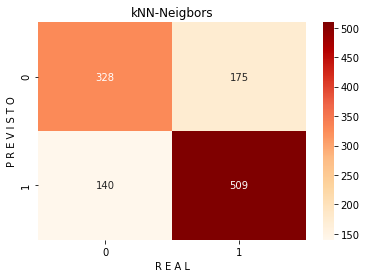

In [39]:
# Confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, cmap='OrRd', annot=True, fmt='2.0f')
plt.title('kNN-Neigbors')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [40]:
print("kNN-Neighbors - Metrics")
print(f"Acurácia: {accuracy_score(y_test, y_pred).round(2)}")
print(f"Precisão: {precision_score(y_test, y_pred).round(2)}")
print(f"Recall: {recall_score(y_test, y_pred).round(2)}")
print(f"F1: {f1_score(y_test, y_pred).round(2)}")

kNN-Neighbors - Metrics
Acurácia: 0.73
Precisão: 0.74
Recall: 0.78
F1: 0.76


## 5.2. VEGA

In [41]:
data_backup.head()

,Unnamed: 0,Id,CAS,SMILES,Status,Experimental value,Predicted value,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
0,0,1,100-00-5,O=[N+]([O-])c1ccc(cc1)Cl,Training,1,1,52,0.463602,43.14,38.1064,3.003401,244.429658,157.556,2.2482
1,1,2,100-01-6,O=[N+]([O-])c1ccc(N)cc1,Training,1,1,52,0.359544,69.16,37.5088,3.003401,242.429658,138.126,1.1770
2,2,3,100-02-7,O=[N+]([O-])c1ccc(O)cc1,Training,0,1,52,0.470728,63.37,34.7612,3.003401,241.674771,139.110,1.3004
3,3,4,100-11-8,O=[N+]([O-])c1ccc(cc1)CBr,Training,1,0,58,0.432586,43.14,45.7274,2.913802,257.648013,216.034,2.4897
4,4,5,100-12-9,O=[N+]([O-])c1ccc(cc1)CC,Training,0,0,58,0.479785,43.14,42.4744,2.913802,253.299498,151.165,2.1572


In [42]:
y_clean = data_backup['Experimental value'].astype(int)
y_vega_clean = data_backup['Predicted value'].astype(int)

In [43]:
cm_vega = confusion_matrix(y_clean, y_vega_clean)

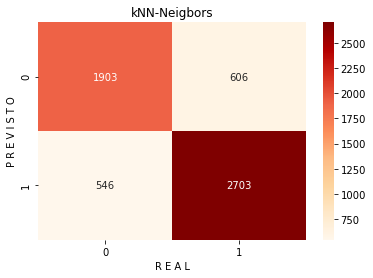

In [44]:
sns.heatmap(cm_vega, cmap='OrRd', annot=True, fmt='2.0f')
plt.title('kNN-Neigbors')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [45]:
print("VEGA - Metrics")
print(f"Acurácia: {accuracy_score(y_clean, y_vega_clean).round(2)}")
print(f"Precisão: {precision_score(y_clean, y_vega_clean).round(2)}")
print(f"Recall: {recall_score(y_clean, y_vega_clean).round(2)}")
print(f"F1: {f1_score(y_clean, y_vega_clean).round(2)}")

VEGA - Metrics
Acurácia: 0.8
Precisão: 0.82
Recall: 0.83
F1: 0.82


As métricas finais para os valores produzidos a partir da Machine Learning utilizando vega obtiveram melhores resultados que o kNN-Neighbors

## 5.3. Hyperparameter

In [46]:
# criando o sistema para hyperparâmetro
# escolhendo um array de valores para k, sendo num_ks um array de 1 a 100, variando de 2 em 2
# seprando os X_train e y_train em X_train_hyp, y_train_hyp, e separando para X_valid e y_valid 
# dentro do for está testando com os valores de k estipulados dentro do array num_ks que vai dar um novo valor para k


from tqdm.notebook import tqdm

num_ks = np.arange(1, 100, 2).astype(int)

X_train_hyp, X_valid, y_train_hyp, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

train_accuracy = []
valid_accuracy = []

for i in tqdm(range(len(num_ks))):
    knn = KNeighborsClassifier(n_neighbors=num_ks[i])
    knn.fit(X_train_hyp, y_train_hyp)
    
    pred_train = knn.predict(X_train_hyp)
    pred_valid  = knn.predict(X_valid)
    
    train_accuracy.append(1-accuracy_score(y_train_hyp, pred_train))
    valid_accuracy.append(1-accuracy_score(y_valid, pred_valid))

  0%|          | 0/50 [00:00<?, ?it/s]

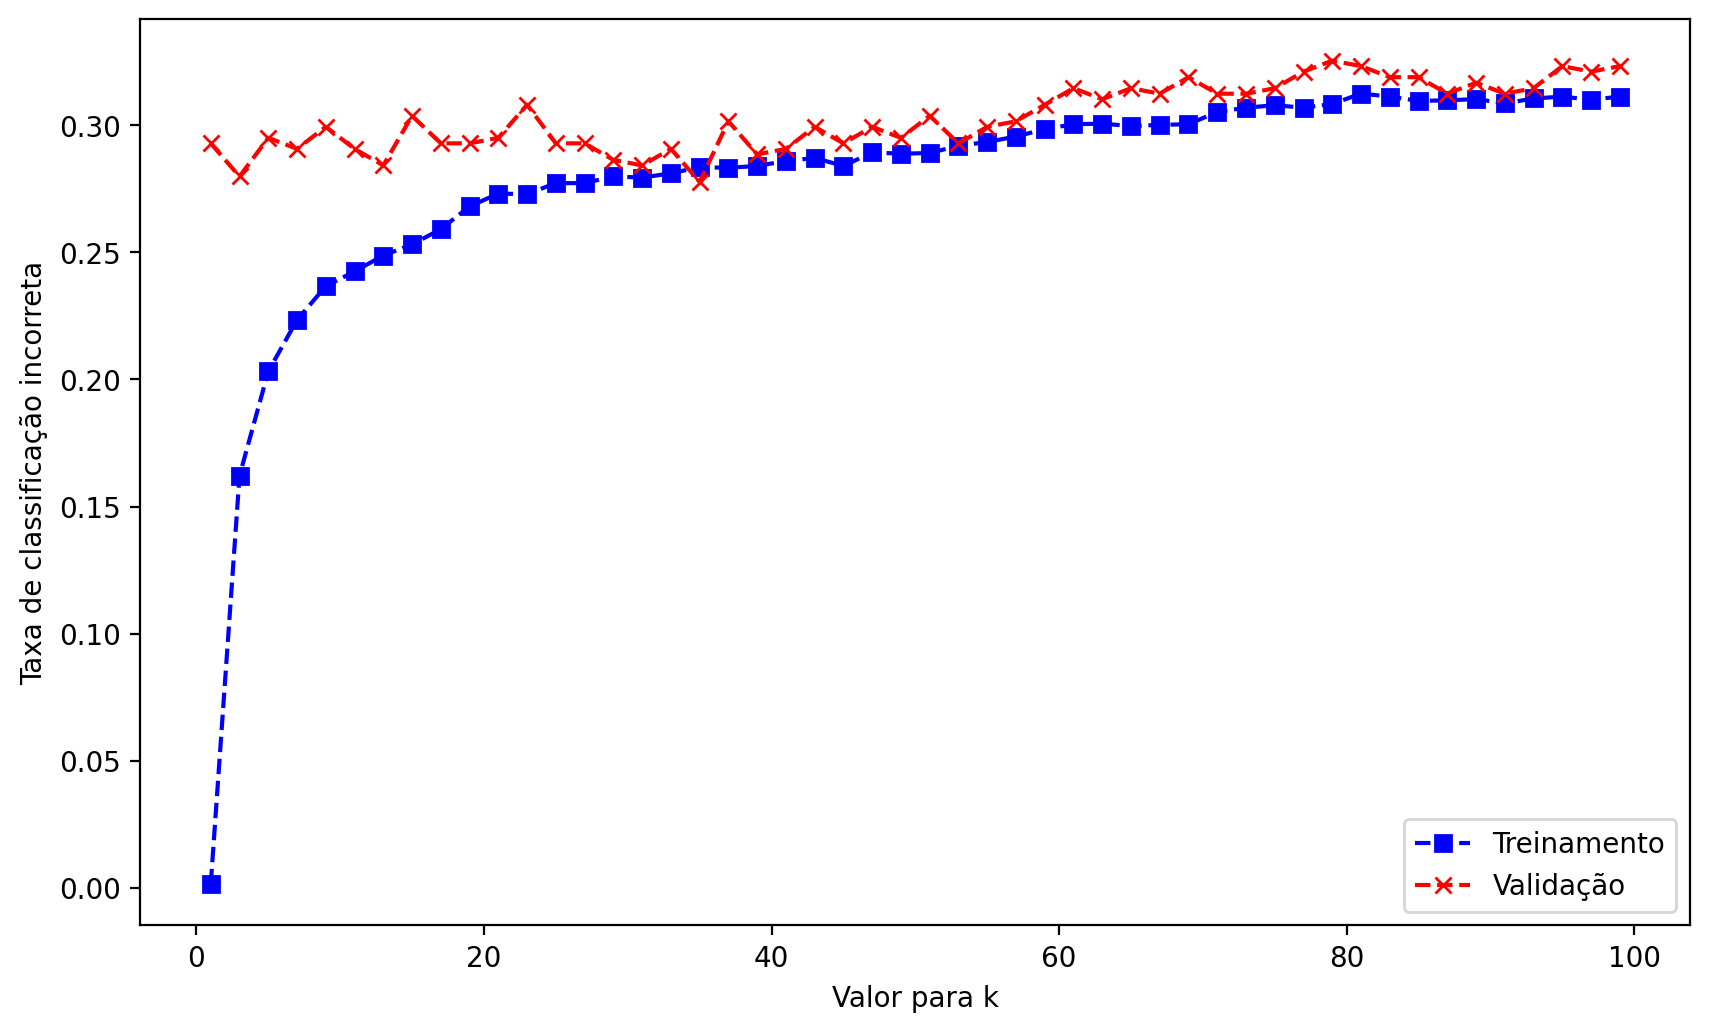

In [47]:
plt.figure(figsize=(10,6), dpi=200)

plt.plot(num_ks, train_accuracy, 'bs--', label="Treinamento")
plt.plot(num_ks, valid_accuracy, 'rx--', label="Validação")

plt.xlabel('Valor para k')
plt.ylabel('Taxa de classificação incorreta')

plt.legend()
plt.show()

## 5.4. Cross-Validation

In [48]:
from sklearn.model_selection import cross_validate

In [49]:
num_ks = np.arange(1, 50, 1).astype(int)

train_misclassification = []
valid_misclassification = []

for i in tqdm(range(len(num_ks))):
    knn = KNeighborsClassifier(n_neighbors=num_ks[i])
    cv_dict = cross_validate(knn, X_train, y_train, cv=10, scoring='accuracy', return_train_score=True)
    
    k_fold_train_scored = cv_dict['train_score']
    k_fold_valid_scored = cv_dict['test_score']
    
    train_misclassification.append(1-k_fold_train_scored.mean())
    valid_misclassification.append(1-k_fold_valid_scored.mean())

  0%|          | 0/49 [00:00<?, ?it/s]

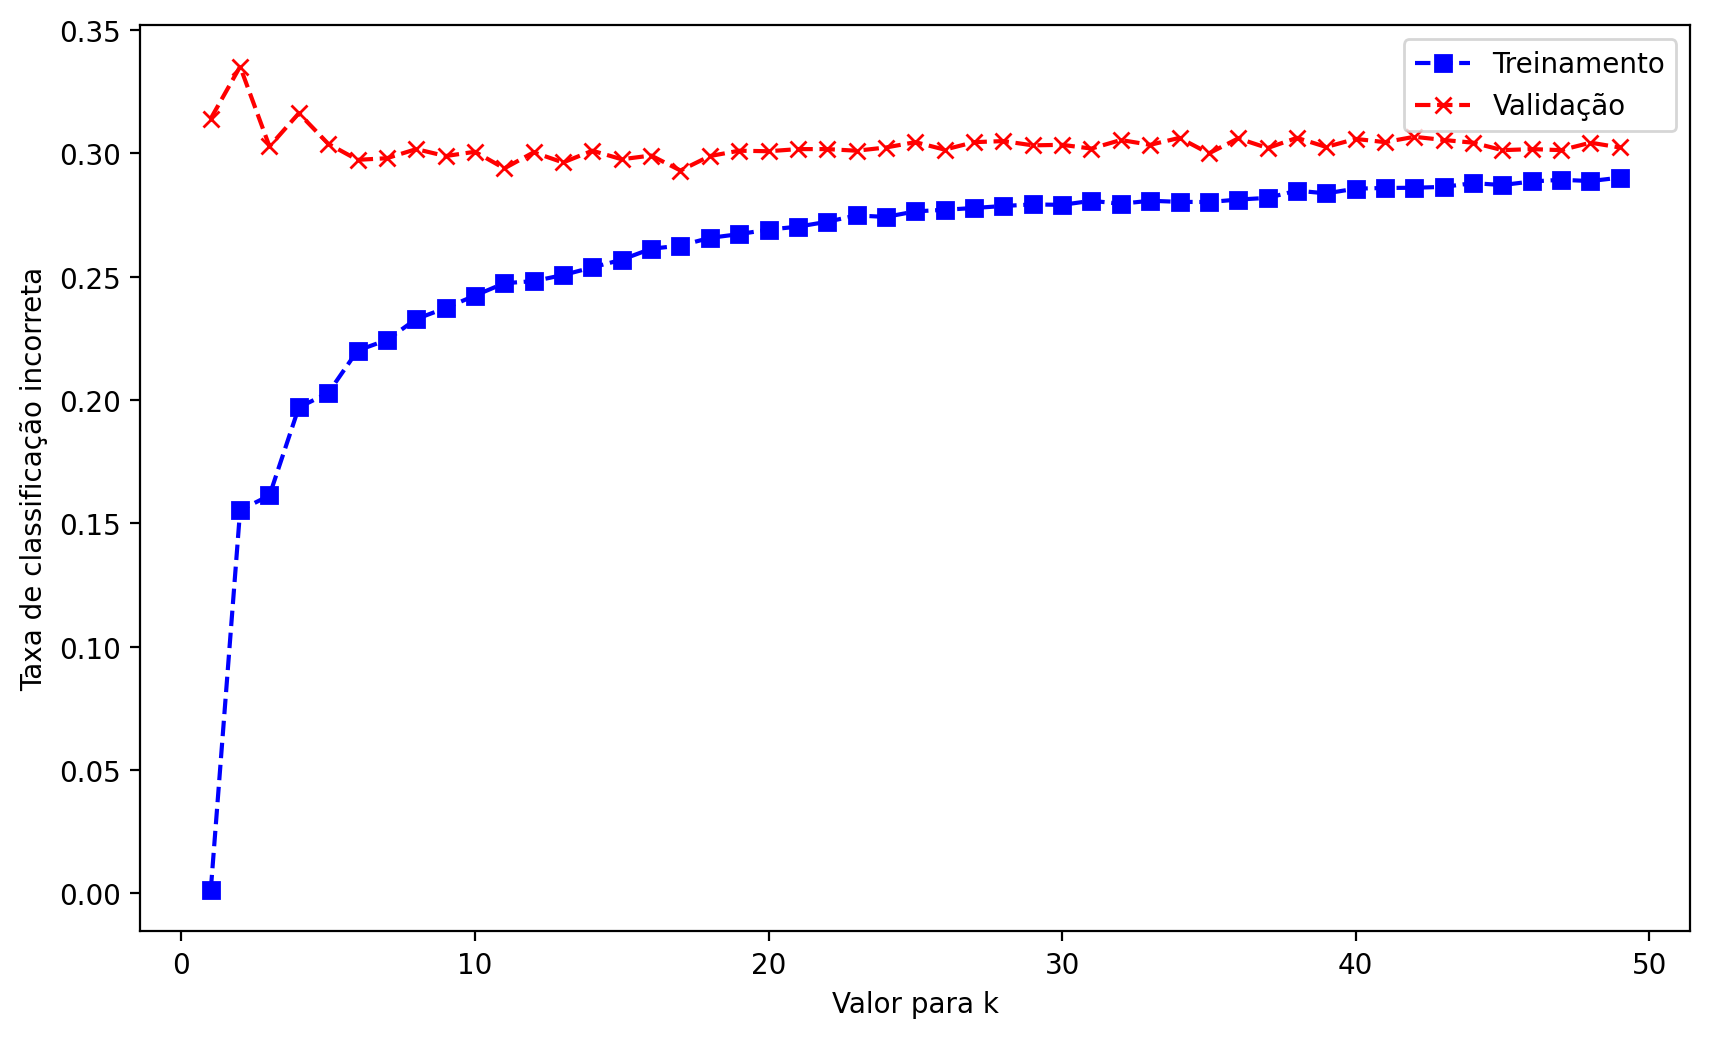

In [50]:
plt.figure(figsize=(10,6), dpi=200)

plt.plot(num_ks, train_misclassification, 'bs--', label='Treinamento')
plt.plot(num_ks, valid_misclassification, 'rx--', label='Validação')

plt.xlabel('Valor para k')
plt.ylabel('Taxa de classificação incorreta')

plt.legend()
plt.show()

In [51]:
print('N° k com erro de classificação mínimo de validação: ', num_ks[np.argmin(valid_misclassification)])

N° k com erro de classificação mínimo de validação:  17


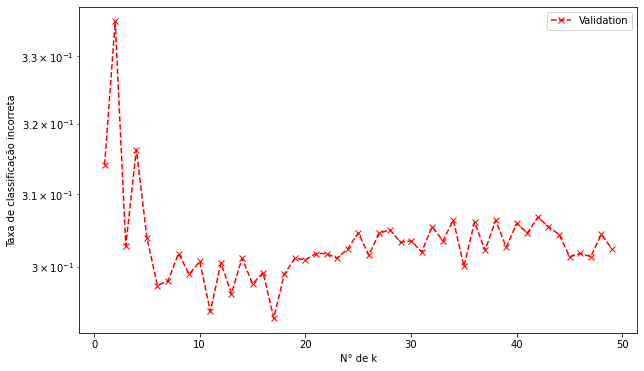

In [52]:
plt.figure(figsize=(10,6))

plt.plot(num_ks, valid_misclassification, 'rx--', label='Validação')

plt.yscale('log')
plt.xlabel('N° de k')
plt.ylabel('Taxa de classificação incorreta')

plt.legend()
plt.show()

Exercicio: You can now go back to your implementation of leave-one-out and train your kNN model using the best k that you found. How does it perform compared to the VEGA kNN? Do you got a better model? Why?

In [93]:
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train, y_train)

y_pred_new_k = knn.predict(X_test)

In [94]:
print("kNN-Neighbors - Metrics")
print(f"Acurácia: {accuracy_score(y_test, y_pred_new_k).round(2)}")
print(f"Precisão: {precision_score(y_test, y_pred_new_k).round(2)}")
print(f"Recall: {recall_score(y_test, y_pred_new_k).round(2)}")
print(f"F1: {f1_score(y_test, y_pred_new_k).round(2)}")

kNN-Neighbors - Metrics
Acurácia: 0.7
Precisão: 0.72
Recall: 0.78
F1: 0.75


Não, pois comparado aos valores demonstrados a cima, quanto maiores os valores para k mais a taxa de classificação incorreta tende a crescer, dessa forma o intervalo entre os valores 10 e 20 possuem as menores taxas de classificação incorreta. 